In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Kütüphaneler başarıyla yüklendi.")


Kütüphaneler başarıyla yüklendi.


In [2]:
df = pd.read_csv("Sleep_health.csv")

print("Dosya başarıyla okundu.")
df.head()


Dosya başarıyla okundu.


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
print("Satır, Sütun:", df.shape)
print("\nSütunlar:\n", df.columns.tolist())
print("\nVeri tipleri:\n", df.dtypes)

print("\nSayısal özet:\n", df.describe())


Satır, Sütun: (374, 13)

Sütunlar:
 ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

Veri tipleri:
 Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

Sayısal özet:
         Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          

In [4]:
eksik = df.isnull().sum()
eksik = eksik[eksik > 0]
print("Eksik veri (varsa):")
print(eksik)

sayisal = df.select_dtypes(include=[np.number]).columns
kategorik = df.select_dtypes(include=["object"]).columns

for col in sayisal:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

for col in kategorik:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

print("Eksik veri doldurma tamamlandı.")


Eksik veri (varsa):
Sleep Disorder    219
dtype: int64
Eksik veri doldurma tamamlandı.


In [5]:
df[["Systolic_BP", "Diastolic_BP"]] = (
    df["Blood Pressure"]
    .astype(str)
    .str.split("/", expand=True)
)


df["Systolic_BP"] = pd.to_numeric(df["Systolic_BP"], errors="coerce")
df["Diastolic_BP"] = pd.to_numeric(df["Diastolic_BP"], errors="coerce")

print("Blood Pressure sütunu başarıyla ayrıldı: Systolic_BP, Diastolic_BP")


Blood Pressure sütunu başarıyla ayrıldı: Systolic_BP, Diastolic_BP


In [6]:
df["Activity_Level"] = pd.cut(
    df["Physical Activity Level"],
    bins=[0, 40, 60, 100],
    labels=["Düşük", "Orta", "Yüksek"]
)


In [7]:
df["HR_Group"] = pd.cut(
    df["Heart Rate"],
    bins=[0, 70, 80, 200],
    labels=["Düşük", "Normal", "Yüksek"]
)


In [8]:
print("\n" + "="*80)
print("SORGU 1: En yaygın uyku bozukluğu türü hangisidir?")
print("="*80)

most_common = df[df["Sleep Disorder"] != "None"]["Sleep Disorder"].value_counts().idxmax()

print(f"En yaygın uyku bozukluğu: {most_common}")




SORGU 1: En yaygın uyku bozukluğu türü hangisidir?
En yaygın uyku bozukluğu: Sleep Apnea


In [9]:
print("\n" + "="*80)
print("SORGU 2: En iyi uyku kalitesine sahip yaş grubu hangisidir?")
print("="*80)


df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[0, 30, 40, 50, 100],
    labels=["20-30", "31-40", "41-50", "50+"]
)


age_quality = df.groupby("Age_Group")["Quality of Sleep"].mean().round(2)


best_group = age_quality.idxmax()
best_value = age_quality.max()

print("Yaş gruplarına göre ortalama uyku kalitesi:")
print(age_quality)

print(f"\n En iyi uyku kalitesine sahip yaş grubu: {best_group} ({best_value}/10)")



SORGU 2: En iyi uyku kalitesine sahip yaş grubu hangisidir?
Yaş gruplarına göre ortalama uyku kalitesi:
Age_Group
20-30    6.16
31-40    7.30
41-50    6.81
50+      8.70
Name: Quality of Sleep, dtype: float64

 En iyi uyku kalitesine sahip yaş grubu: 50+ (8.7/10)


/tmp/ipython-input-1780510314.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_quality = df.groupby("Age_Group")["Quality of Sleep"].mean().round(2)


In [10]:
print("\n" + "="*80)
print("SORGU 3: Hangi meslek grubu daha çok uyuyor?")
print("="*80)
occupation_sleep = df.groupby("Occupation")["Sleep Duration"].mean().sort_values(ascending=False)
print(occupation_sleep.head(10))
print(f"\n Yorum: En çok uyuyan meslek: {occupation_sleep.idxmax()} ({occupation_sleep.max():.2f} saat)")
print(f"En az uyuyan meslek: {occupation_sleep.idxmin()} ({occupation_sleep.min():.2f} saat)")



SORGU 3: Hangi meslek grubu daha çok uyuyor?
Occupation
Engineer             7.987302
Lawyer               7.410638
Accountant           7.113514
Nurse                7.063014
Doctor               6.970423
Manager              6.900000
Software Engineer    6.750000
Teacher              6.690000
Salesperson          6.403125
Scientist            6.000000
Name: Sleep Duration, dtype: float64

 Yorum: En çok uyuyan meslek: Engineer (7.99 saat)
En az uyuyan meslek: Sales Representative (5.90 saat)


In [11]:
print("\n" + "=" * 90)
print("SORGU 4: Stres seviyesi ile uyku kalitesi arasındaki ilişki (korelasyon) nedir?")
print("=" * 90)

q4 = df["Stress Level"].corr(df["Quality of Sleep"])
print(f"Korelasyon Katsayısı: {q4:.4f}")

if q4 < -0.5:
    ilişki = "güçlü negatif"
elif q4 < 0:
    ilişki = "zayıf negatif"
elif q4 < 0.5:
    ilişki = "zayıf pozitif"
else:
    ilişki = "güçlü pozitif"

print(f"\n Yorum: Stres seviyesi ve uyku kalitesi arasında {ilişki} bir ilişki vardır.")



SORGU 4: Stres seviyesi ile uyku kalitesi arasındaki ilişki (korelasyon) nedir?
Korelasyon Katsayısı: -0.8988

 Yorum: Stres seviyesi ve uyku kalitesi arasında güçlü negatif bir ilişki vardır.


In [12]:
print("\n" + "=" * 90)
print("SORGU 5: BMI kategorilerine göre uyku bozukluğu dağılımı (%) nasıldır?")
print("=" * 90)

q5 = (pd.crosstab(df["BMI Category"], df["Sleep Disorder"], normalize="index") * 100).round(2)
print(q5)

print("\n Yorum: BMI kategorilerine göre uyku bozukluğu oranları farklılık gösterebilir.")



SORGU 5: BMI kategorilerine göre uyku bozukluğu dağılımı (%) nasıldır?
Sleep Disorder  Insomnia  Sleep Apnea
BMI Category                         
Normal              3.59        96.41
Normal Weight       9.52        90.48
Obese              40.00        60.00
Overweight         43.24        56.76

 Yorum: BMI kategorilerine göre uyku bozukluğu oranları farklılık gösterebilir.


In [13]:
print("\n" + "=" * 90)
print("SORGU 6: Aktivite seviyesine göre ortalama uyku kalitesi nasıldır?")
print("=" * 90)

q6 = df.groupby("Activity_Level")["Quality of Sleep"].mean().round(2)
print(q6)

best_activity = q6.idxmax()
print(f"\nYorum: En yüksek uyku kalitesi '{best_activity}' aktivite seviyesinde.")



SORGU 6: Aktivite seviyesine göre ortalama uyku kalitesi nasıldır?
Activity_Level
Düşük     7.04
Orta      7.20
Yüksek    7.59
Name: Quality of Sleep, dtype: float64

Yorum: En yüksek uyku kalitesi 'Yüksek' aktivite seviyesinde.


/tmp/ipython-input-2185255889.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q6 = df.groupby("Activity_Level")["Quality of Sleep"].mean().round(2)


In [14]:
print("\n" + "=" * 90)
print("SORGU 7: Günlük adım sayısı ile uyku süresi arasındaki korelasyon nedir?")
print("=" * 90)

q7 = df["Daily Steps"].corr(df["Sleep Duration"])
print(f"Korelasyon Katsayısı: {q7:.4f}")

print(f"\n Yorum: Korelasyon değeri sıfıra yakınsa ilişki zayıftır.")



SORGU 7: Günlük adım sayısı ile uyku süresi arasındaki korelasyon nedir?
Korelasyon Katsayısı: -0.0395

 Yorum: Korelasyon değeri sıfıra yakınsa ilişki zayıftır.


In [15]:
print("\n" + "=" * 90)
print("SORGU 8: Uyku bozukluğu türüne göre temel sağlık göstergeleri ortalamaları nelerdir?")
print("=" * 90)

q8 = df.groupby("Sleep Disorder")[["Sleep Duration","Quality of Sleep","Stress Level","Physical Activity Level"]].mean().round(2)
print(q8)

print("\n Yorum: Bozukluk türüne göre ortalamalar farklılaşabilir.")



SORGU 8: Uyku bozukluğu türüne göre temel sağlık göstergeleri ortalamaları nelerdir?
                Sleep Duration  Quality of Sleep  Stress Level  \
Sleep Disorder                                                   
Insomnia                  6.59              6.53          5.87   
Sleep Apnea               7.27              7.52          5.26   

                Physical Activity Level  
Sleep Disorder                           
Insomnia                          46.82  
Sleep Apnea                       62.37  

 Yorum: Bozukluk türüne göre ortalamalar farklılaşabilir.


In [16]:
print("\n" + "=" * 90)
print("SORGU 9: Kalp atış hızı gruplarına göre uyku kalitesi nasıldır?")
print("=" * 90)

q9 = df.groupby("HR_Group")["Quality of Sleep"].mean().round(2)
print(q9)

print("\n Yorum: Kalp atış hızı gruplarına göre uyku kalitesi farklılık göstermektedir.")



SORGU 9: Kalp atış hızı gruplarına göre uyku kalitesi nasıldır?
HR_Group
Düşük     7.97
Normal    6.14
Yüksek    6.00
Name: Quality of Sleep, dtype: float64

 Yorum: Kalp atış hızı gruplarına göre uyku kalitesi farklılık göstermektedir.


/tmp/ipython-input-2287933821.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q9 = df.groupby("HR_Group")["Quality of Sleep"].mean().round(2)


In [17]:
print("\n" + "=" * 90)
print("SORGU 10: Yaş gruplarına göre uyku bozukluğu dağılımı (%) nasıldır?")
print("=" * 90)

q10 = (pd.crosstab(df["Age_Group"], df["Sleep Disorder"], normalize="index") * 100).round(2)
print(q10)

print("\n Yorum: Yaşa göre bozukluk oranları değişebilir.")



SORGU 10: Yaş gruplarına göre uyku bozukluğu dağılımı (%) nasıldır?
Sleep Disorder  Insomnia  Sleep Apnea
Age_Group                            
20-30              12.50        87.50
31-40               3.76        96.24
41-50              45.86        54.14
50+                 9.21        90.79

 Yorum: Yaşa göre bozukluk oranları değişebilir.


In [18]:
print("\n" + "=" * 90)
print("SORGU 11: Stres seviyesi ile kan basıncı (Systolic/Diastolic) korelasyonları nedir?")
print("=" * 90)

q11_sys = df["Stress Level"].corr(df["Systolic_BP"])
q11_dia = df["Stress Level"].corr(df["Diastolic_BP"])

print(f"Sistolik Korelasyon  : {q11_sys:.4f}")
print(f"Diastolik Korelasyon : {q11_dia:.4f}")

print("\n Yorum: Pozitif korelasyon -> stres artınca basınç artma eğilimi.")



SORGU 11: Stres seviyesi ile kan basıncı (Systolic/Diastolic) korelasyonları nedir?
Sistolik Korelasyon  : 0.1028
Diastolik Korelasyon : 0.0918

 Yorum: Pozitif korelasyon -> stres artınca basınç artma eğilimi.


In [19]:
print("\n" + "=" * 90)
print("SORGU 12: BMI kategorilerine göre ortalama uyku süresi nasıldır?")
print("=" * 90)

q12 = df.groupby("BMI Category")["Sleep Duration"].mean().round(2)
print(q12)

print("\n Yorum: BMI ile uyku süresi ilişkili olabilir.")



SORGU 12: BMI kategorilerine göre ortalama uyku süresi nasıldır?
BMI Category
Normal           7.39
Normal Weight    7.33
Obese            6.96
Overweight       6.77
Name: Sleep Duration, dtype: float64

 Yorum: BMI ile uyku süresi ilişkili olabilir.


In [20]:
print("\n" + "="*80)
print("SORGU 13: Yüksek uyku kalitesine sahip bireylerin stres profili")
print("="*80)

high_quality = df[df["Quality of Sleep"] >= 7]
mean_stress = high_quality["Stress Level"].mean()

print(f"Ortalama stres seviyesi: {mean_stress:.2f}/10")

print("\nYorum: Kaliteli uyku, stres seviyesinin daha düşük olmasıyla ilişkilidir.")



SORGU 13: Yüksek uyku kalitesine sahip bireylerin stres profili
Ortalama stres seviyesi: 4.39/10

Yorum: Kaliteli uyku, stres seviyesinin daha düşük olmasıyla ilişkilidir.


In [21]:
print("\n" + "="*80)
print("SORGU 14: En stresli meslek hangisidir?")
print("="*80)

occupation_stress = (
    df.groupby("Occupation")["Stress Level"]
    .mean()
    .sort_values(ascending=False)
    .round(2)
)

print("Mesleklere göre ortalama stres seviyesi (Top 10):")
print(occupation_stress.head(10))

most_stressful_job = occupation_stress.idxmax()
max_stress_value = occupation_stress.max()

print(f"\nYorum: En stresli meslek '{most_stressful_job}' olup "
      f"ortalama stres seviyesi {max_stress_value}/10'dur.")



SORGU 14: En stresli meslek hangisidir?
Mesleklere göre ortalama stres seviyesi (Top 10):
Occupation
Sales Representative    8.00
Salesperson             7.00
Scientist               7.00
Doctor                  6.73
Software Engineer       6.00
Nurse                   5.55
Lawyer                  5.06
Manager                 5.00
Accountant              4.59
Teacher                 4.53
Name: Stress Level, dtype: float64

Yorum: En stresli meslek 'Sales Representative' olup ortalama stres seviyesi 8.0/10'dur.


In [22]:
print("\n" + "=" * 90)
print("SORGU 15: Fiziksel aktivite düzeyi ile stres seviyesi arasındaki korelasyon nedir?")
print("=" * 90)

q15 = df["Physical Activity Level"].corr(df["Stress Level"])
print(f"Korelasyon Katsayısı: {q15:.4f}")

print("\n Yorum: Negatifse aktivite artınca stres azalma eğilimi.")



SORGU 15: Fiziksel aktivite düzeyi ile stres seviyesi arasındaki korelasyon nedir?
Korelasyon Katsayısı: -0.0341

 Yorum: Negatifse aktivite artınca stres azalma eğilimi.


In [23]:
print("\n" + "=" * 90)
print("SORGU 16: Günlük adım sayısı ile fiziksel aktivite seviyesi korelasyonu nedir?")
print("=" * 90)

q16 = df["Daily Steps"].corr(df["Physical Activity Level"])
print(f"Korelasyon Katsayısı: {q16:.4f}")

print("\nYorum: Adım arttıkça aktivite artar")



SORGU 16: Günlük adım sayısı ile fiziksel aktivite seviyesi korelasyonu nedir?
Korelasyon Katsayısı: 0.7727

Yorum: Adım arttıkça aktivite artar


In [24]:
print("\n" + "=" * 90)
print("SORGU 17: Uyku bozukluğu  görülen meslekler hangileridir? (Top 10)")
print("=" * 90)

q17 = df[df["Sleep Disorder"] != "None"].groupby("Occupation").size().sort_values(ascending=False)
print(q17.head(10))

print("\n Yorum: Vardiya/stresli işler bozukluk riskini artırabilir.")



SORGU 17: Uyku bozukluğu  görülen meslekler hangileridir? (Top 10)
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
dtype: int64

 Yorum: Vardiya/stresli işler bozukluk riskini artırabilir.


In [25]:
print("\n" + "=" * 90)
print("SORGU 18: Günlük adım sayısı ile uyku kalitesi arasındaki korelasyon nedir?")
print("=" * 90)

q18 = df["Daily Steps"].corr(df["Quality of Sleep"])
print(f"Korelasyon Katsayısı: {q18:.4f}")

print("\nYorum: Değer sıfıra yakınsa güçlü ilişki yoktur.")



SORGU 18: Günlük adım sayısı ile uyku kalitesi arasındaki korelasyon nedir?
Korelasyon Katsayısı: 0.0168

Yorum: Değer sıfıra yakınsa güçlü ilişki yoktur.


In [26]:
print("\n" + "=" * 90)
print("SORGU 19: Sistolik ve diastolik kan basıncı arasındaki ilişki nedir?")
print("=" * 90)

q19 = df["Systolic_BP"].corr(df["Diastolic_BP"])
print(f"Korelasyon Katsayısı: {q19:.4f}")

print("\n Yorum: Genelde güçlü pozitif ilişki çıkar.")



SORGU 19: Sistolik ve diastolik kan basıncı arasındaki ilişki nedir?
Korelasyon Katsayısı: 0.9729

 Yorum: Genelde güçlü pozitif ilişki çıkar.


In [27]:
print("\n" + "=" * 90)
print("SORGU 20: Yaş ile stres seviyesi arasındaki ilişki nedir?")
print("=" * 90)

q20 = df["Age"].corr(df["Stress Level"])
print(f"Korelasyon Katsayısı: {q20:.4f}")

print("\nYorum: Negatif korelasyon bulunmaktadır. "
      "Yaş arttıkça stres seviyesinin azalma eğiliminde olduğu görülmektedir.")



SORGU 20: Yaş ile stres seviyesi arasındaki ilişki nedir?
Korelasyon Katsayısı: -0.4223

Yorum: Negatif korelasyon bulunmaktadır. Yaş arttıkça stres seviyesinin azalma eğiliminde olduğu görülmektedir.


In [28]:
print("\n" + "=" * 90)
print("21.SORGU: Yüksek stresli (>=7) ve uyku bozukluğu olan kaç kişi var?")
print("=" * 90)

risk_group = df[
    (df["Stress Level"] >= 7) &
    (df["Sleep Disorder"] != "None")
]

risk_count = len(risk_group)
risk_percent = (risk_count / len(df)) * 100

print(f"Riskli profil sayısı: {risk_count} / {len(df)} (%{risk_percent:.2f})")

risk_means = risk_group[
    ["Age", "Sleep Duration", "Quality of Sleep", "Daily Steps", "Heart Rate"]
].mean().round(2)

print("\nRiskli profil ortalamaları:")
print(risk_means)

print("\nYorum: Bu grup yüksek stres altında olup aynı zamanda uyku bozukluğu yaşayan bireyleri temsil etmektedir.")



21.SORGU: Yüksek stresli (>=7) ve uyku bozukluğu olan kaç kişi var?
Riskli profil sayısı: 120 / 374 (%32.09)

Riskli profil ortalamaları:
Age                   40.97
Sleep Duration         6.22
Quality of Sleep       5.92
Daily Steps         6795.83
Heart Rate            73.77
dtype: float64

Yorum: Bu grup yüksek stres altında olup aynı zamanda uyku bozukluğu yaşayan bireyleri temsil etmektedir.


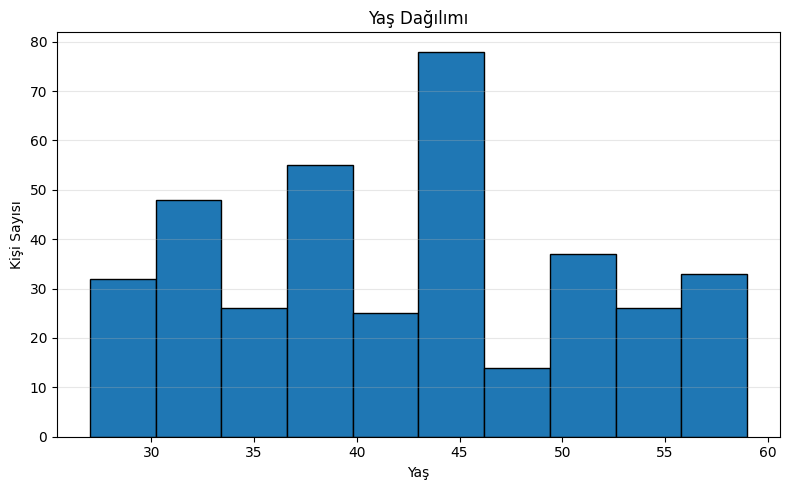

Age_Group
20-30     32
31-40    133
41-50    133
50+       76
Name: count, dtype: int64


In [29]:
plt.figure(figsize=(8,5))
plt.hist(df["Age"], bins=10, edgecolor="black")
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Kişi Sayısı")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[0, 30, 40, 50, 100],
    labels=["20-30", "31-40", "41-50", "50+"]
)


age_counts = df["Age_Group"].value_counts().sort_index()


print(age_counts)


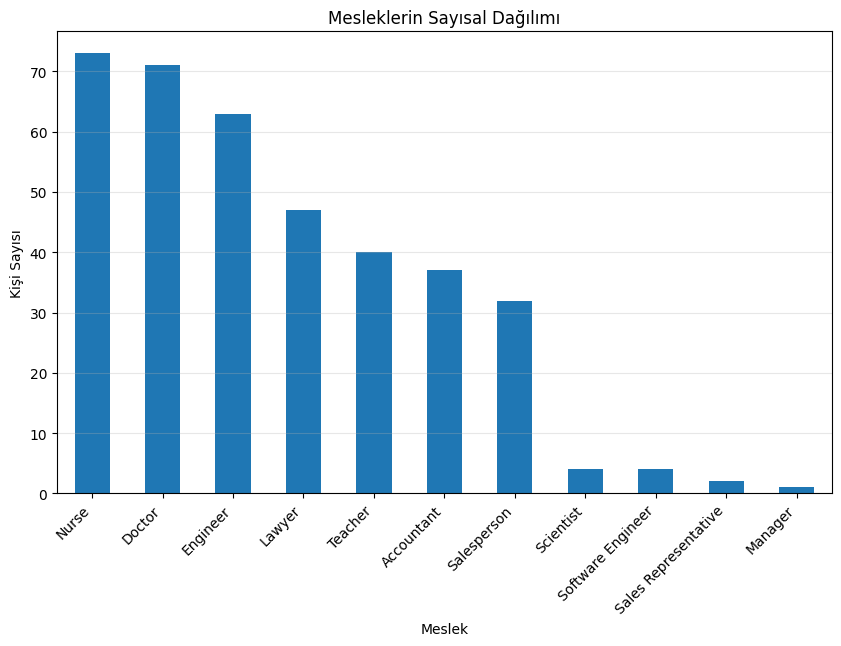

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64


In [31]:
plt.figure(figsize=(10,6))
df["Occupation"].value_counts().plot(kind="bar")
plt.title("Mesleklerin Sayısal Dağılımı")
plt.xlabel("Meslek")
plt.ylabel("Kişi Sayısı")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()


occupation_counts = df["Occupation"].value_counts()
print(occupation_counts)


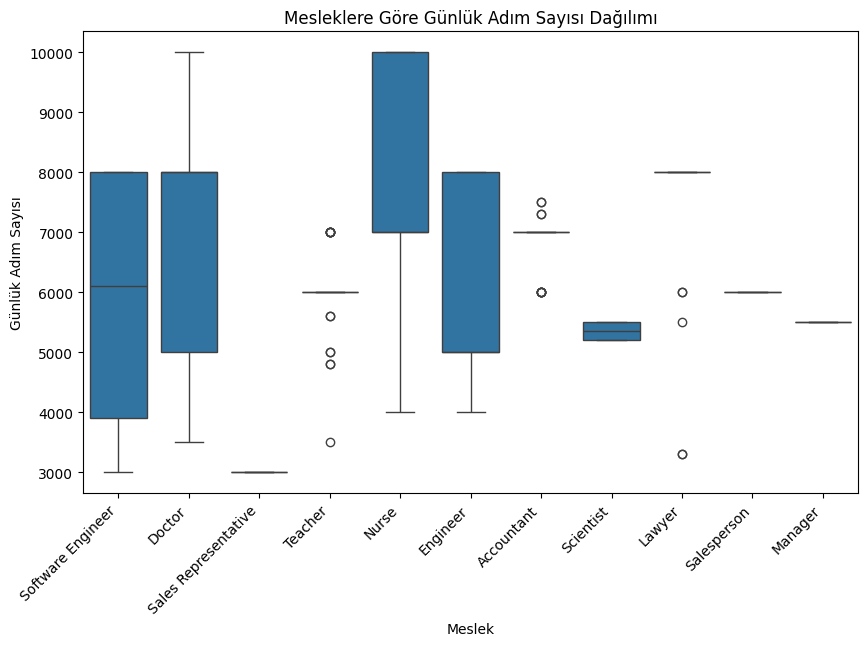

                      Kişi_Sayısı  Ortalama  Medyan  Minimum  Maksimum
Occupation                                                            
Accountant                     37   6881.08  7000.0     6000      7500
Doctor                         71   6808.45  8000.0     3500     10000
Engineer                       63   5980.95  5000.0     4000      8000
Lawyer                         47   7661.70  8000.0     3300      8000
Manager                         1   5500.00  5500.0     5500      5500
Nurse                          73   8057.53  7000.0     4000     10000
Sales Representative            2   3000.00  3000.0     3000      3000
Salesperson                    32   6000.00  6000.0     6000      6000
Scientist                       4   5350.00  5350.0     5200      5500
Software Engineer               4   5800.00  6100.0     3000      8000
Teacher                        40   5957.50  6000.0     3500      7000


In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Occupation", y="Daily Steps")
plt.title("Mesleklere Göre Günlük Adım Sayısı Dağılımı")
plt.xlabel("Meslek")
plt.ylabel("Günlük Adım Sayısı")
plt.xticks(rotation=45, ha="right")
plt.show()

occupation_steps_stats = df.groupby("Occupation")["Daily Steps"].agg(
    Kişi_Sayısı="count",
    Ortalama="mean",
    Medyan="median",
    Minimum="min",
    Maksimum="max"
).round(2)

print(occupation_steps_stats)



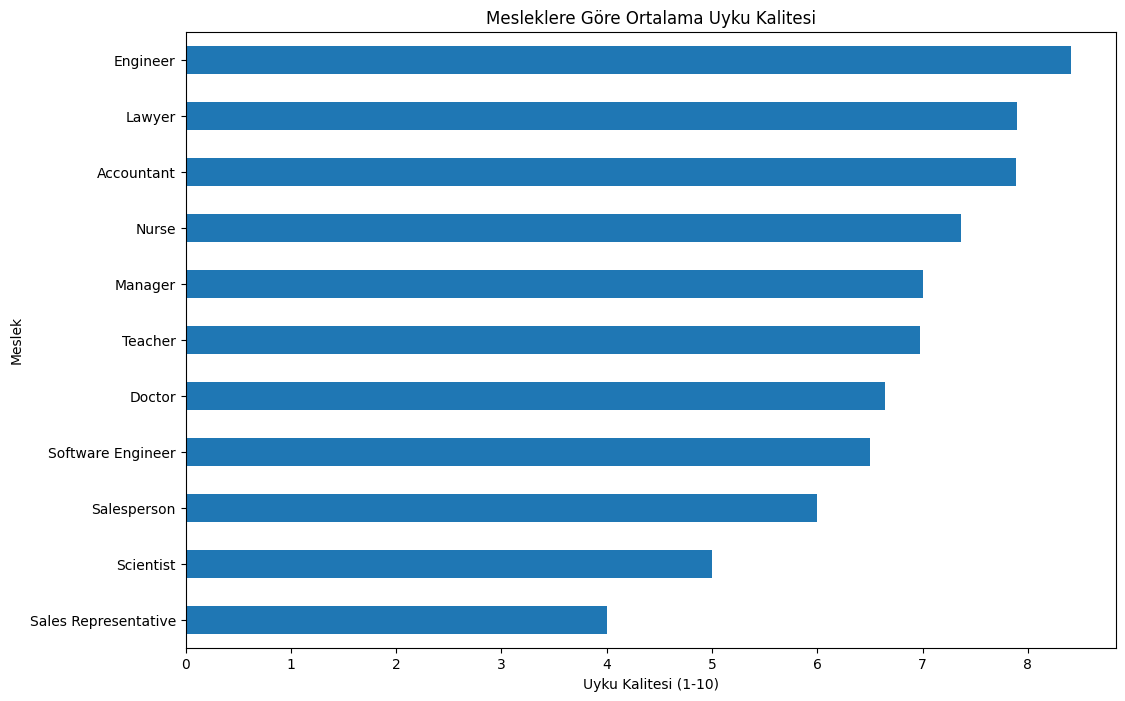

Occupation
Sales Representative    4.00
Scientist               5.00
Salesperson             6.00
Software Engineer       6.50
Doctor                  6.65
Teacher                 6.98
Manager                 7.00
Nurse                   7.37
Accountant              7.89
Lawyer                  7.89
Engineer                8.41
Name: Quality of Sleep, dtype: float64


In [33]:
plt.figure(figsize=(12, 8))
occupation_quality = df.groupby("Occupation")["Quality of Sleep"].mean().sort_values()
occupation_quality.plot(kind="barh")
plt.title("Mesleklere Göre Ortalama Uyku Kalitesi")
plt.xlabel("Uyku Kalitesi (1-10)")
plt.ylabel("Meslek")
plt.show()

occupation_quality = (
    df.groupby("Occupation")["Quality of Sleep"]
    .mean()
    .round(2)
    .sort_values()
)

print(occupation_quality)

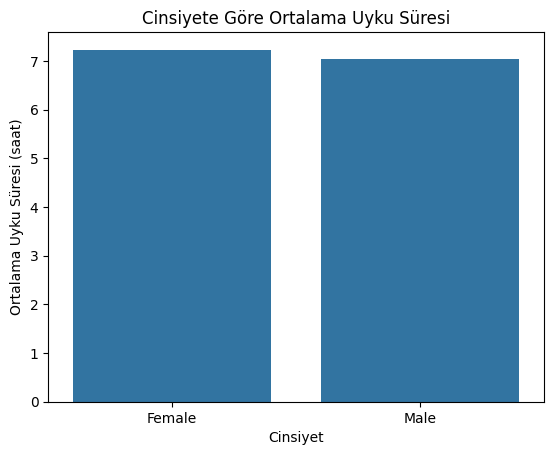

Gender
Female    7.23
Male      7.04
Name: Sleep Duration, dtype: float64


In [40]:
plt.figure()
gender_sleep_df = df.groupby("Gender")["Sleep Duration"].mean().reset_index()
sns.barplot(data=gender_sleep_df, x="Gender", y="Sleep Duration")
plt.title("Cinsiyete Göre Ortalama Uyku Süresi")
plt.xlabel("Cinsiyet")
plt.ylabel("Ortalama Uyku Süresi (saat)")
plt.show()

gender_sleep = (
    df.groupby("Gender")["Sleep Duration"]
    .mean()
    .round(2)
)

print(gender_sleep)

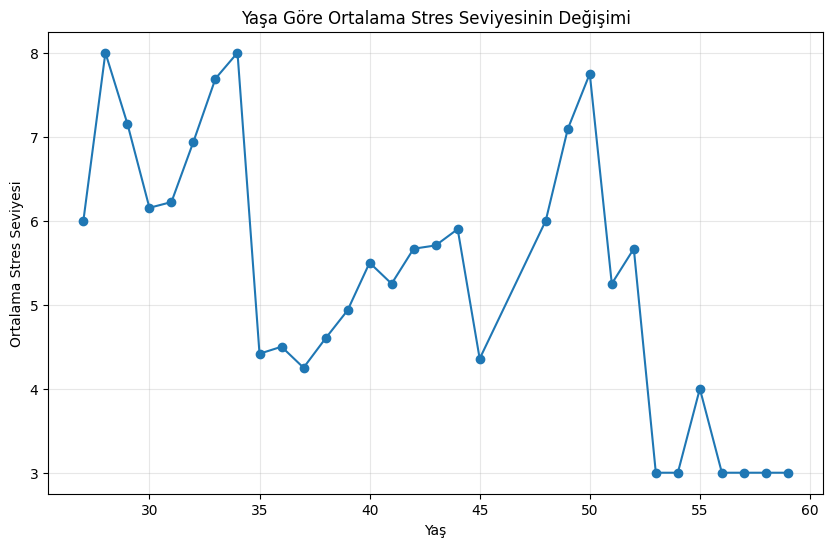

Age
27    6.00
28    8.00
29    7.15
30    6.15
31    6.22
32    6.94
33    7.69
34    8.00
35    4.42
36    4.50
37    4.25
38    4.60
39    4.93
40    5.50
41    5.25
42    5.67
43    5.71
44    5.90
45    4.36
48    6.00
49    7.09
50    7.75
51    5.25
52    5.67
53    3.00
54    3.00
55    4.00
56    3.00
57    3.00
58    3.00
59    3.00
Name: Stress Level, dtype: float64


In [36]:
age_stress = (
    df.groupby("Age")["Stress Level"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(10,6))
plt.plot(age_stress.index, age_stress.values, marker="o")
plt.xlabel("Yaş")
plt.ylabel("Ortalama Stres Seviyesi")
plt.title("Yaşa Göre Ortalama Stres Seviyesinin Değişimi")
plt.grid(alpha=0.3)
plt.show()

age_stress = (
    df.groupby("Age")["Stress Level"]
    .mean()
    .round(2)
    .sort_index()
)

print(age_stress)



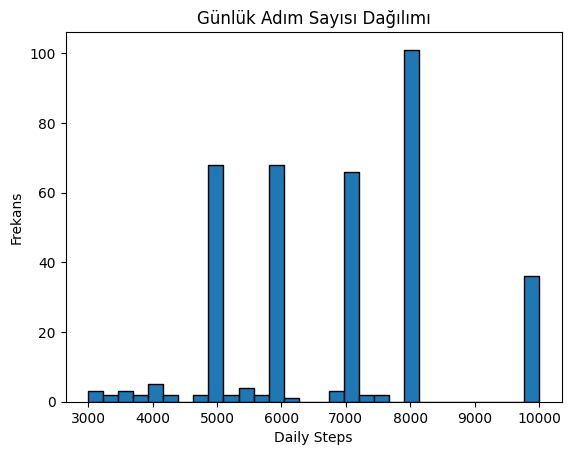

count      374.00
mean      6816.84
std       1617.92
min       3000.00
25%       5600.00
50%       7000.00
75%       8000.00
max      10000.00
Name: Daily Steps, dtype: float64


In [38]:
plt.figure()
plt.hist(df["Daily Steps"], bins=30, edgecolor="black")
plt.title("Günlük Adım Sayısı Dağılımı")
plt.xlabel("Daily Steps")
plt.ylabel("Frekans")
plt.show()

daily_steps_stats = df["Daily Steps"].describe().round(2)
print(daily_steps_stats)

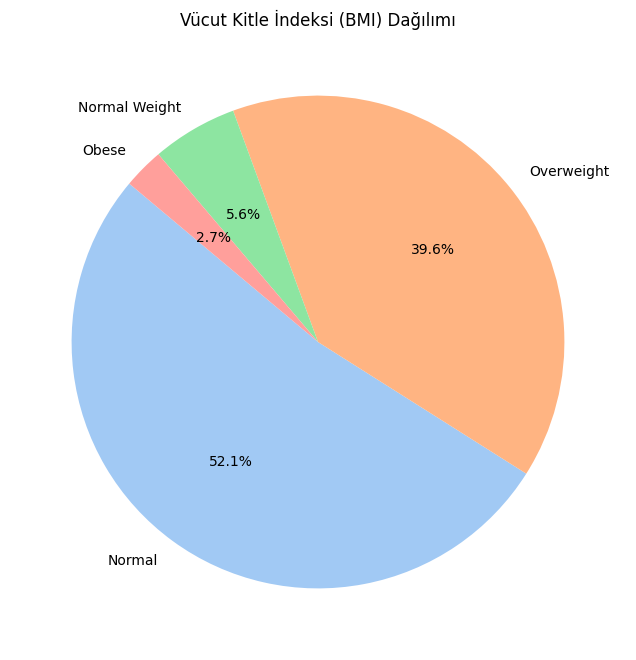

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64


In [39]:
plt.figure(figsize=(8, 8))
bmi_counts = df['BMI Category'].value_counts()
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Vücut Kitle İndeksi (BMI) Dağılımı')
plt.show()

bmi_counts = df["BMI Category"].value_counts()
print(bmi_counts)

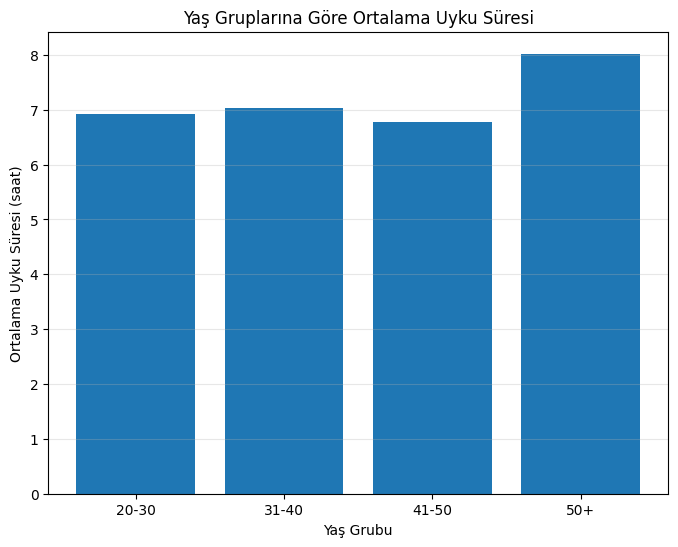

Age_Group
20-30    6.92
31-40    7.03
41-50    6.78
50+      8.02
Name: Sleep Duration, dtype: float64


/tmp/ipython-input-723087769.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sleep = df.groupby("Age_Group")["Sleep Duration"].mean().round(2)
/tmp/ipython-input-723087769.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sleep = df.groupby("Age_Group")["Sleep Duration"].mean().round(2)


In [ ]:
plt.figure(figsize=(8,6))
plt.bar(age_sleep.index, age_sleep.values)
plt.xlabel("Yaş Grubu")
plt.ylabel("Ortalama Uyku Süresi (saat)")
plt.title("Yaş Gruplarına Göre Ortalama Uyku Süresi")
plt.grid(axis="y", alpha=0.3)
plt.show()
df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[0, 30, 40, 50, 100],
    labels=["20-30", "31-40", "41-50", "50+"]
)

age_sleep = df.groupby("Age_Group")["Sleep Duration"].mean().round(2)

age_sleep = df.groupby("Age_Group")["Sleep Duration"].mean().round(2)

print(age_sleep)
